<a href="https://colab.research.google.com/github/Guptasrijal0901/python-project--test/blob/master/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib svgwrite cairosvg chardet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import cairosvg
import chardet

# Function to detect file encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# Function to inspect file content
def inspect_file(file_path):
    with open(file_path, 'rb') as file:
        content = file.read(500)  # Read first 500 bytes
    print(content[:100])  # Print first 100 bytes to get an idea of the content

# Function to read the CSV file and parse the polylines
def read_csv(csv_path):
    encodings = ['utf-8', 'ISO-8859-1', 'latin1', 'cp1252']
    for encoding in encodings:
        try:
            df = pd.read_csv(csv_path, encoding=encoding, errors='replace')
            np_path_XYs = df.to_numpy()
            path_XYs = []

            # Check if the dataframe is empty or has unexpected structure
            if np_path_XYs.size == 0 or np_path_XYs.shape[1] < 3:
                raise ValueError("CSV file has an unexpected structure or is empty")

            for i in np.unique(np_path_XYs[:, 0]):
                npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
                XYs = []
                for j in np.unique(npXYs[:, 0]):
                    XY = npXYs[npXYs[:, 0] == j][:, 1:]
                    XYs.append(XY)
                path_XYs.append(XYs)

            return path_XYs
        except (UnicodeDecodeError, ValueError) as e:
            print(f"Error reading CSV with encoding {encoding}: {e}")
            continue  # Try the next encoding
    raise ValueError("Unable to read the file with known encodings")

# Function to plot the polylines
def plot_paths(paths_XYs, title='Polyline Plot'):
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))

    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)

    ax.set_aspect('equal')
    plt.title(title)
    plt.show()

# Function to save the polylines as SVG and PNG
def polylines2svg(paths_XYs, svg_path):
    colours = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    W, H = 0, 0

    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))

    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)

    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    group = dwg.g()

    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(f"M {XY[0, 0]} {XY[0, 1]}")
            for j in range(1, len(XY)):
                path_data.append(f"L {XY[j, 0]} {XY[j, 1]}")
            if not np.allclose(XY[0], XY[-1]):
                path_data.append("Z")

        group.add(dwg.path(d=" ".join(path_data), fill='none', stroke=c, stroke_width=2))

    dwg.add(group)
    dwg.save()

    print(f"SVG saved at: {svg_path}")

    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(url=svg_path, write_to=png_path,
                     parent_width=W, parent_height=H,
                     output_width=fact * W, output_height=fact * H,
                     background_color='white')

    print(f"PNG saved at: {png_path}")

    return png_path

# Inspect file content for debugging
inspect_file('/content/occlusion2.csv')
inspect_file('/content/occlusion2_sol.csv')

# Detect encoding of CSV files
input_encoding = detect_encoding('/content/occlusion2.csv')
solution_encoding = detect_encoding('/content/occlusion2_sol.csv')

print(f"Detected encoding for input CSV: {input_encoding}")
print(f"Detected encoding for solution CSV: {solution_encoding}")

# Read the input and solution CSV files
input_paths = read_csv('/content/occlusion2.csv')
solution_paths = read_csv('/content/occlusion2_sol.csv')

# Plot the input and solution paths
plot_paths(input_paths, title='Input Polylines (Occlusion2)')
plot_paths(solution_paths, title='Expected Solution Polylines (Occlusion2_Sol)')

# Save the polylines as SVG and PNG files
input_svg = polylines2svg(input_paths, '/content/occlusion2.svg')
solution_svg = polylines2svg(solution_paths, '/content/occlusion2_sol.svg')

print(f"SVG and PNG files saved: {input_svg}, {solution_svg}")


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x052\x00\x00\x03\x89\x08\x02\x00\x00\x00\xa1\xefJ\x8f\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xed\xdd\xdbv\xf2\xc8\x92\xa8Q\xb1F\xbd\xff+\xb3/\xdc\xf6\xe67\x06t\xc8CD\xe4\x9c\xa3/\xfabU\x95\rB\xca\x8fH\xc9'
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x052\x00\x00\x03\x89\x08\x02\x00\x00\x00\xa1\xefJ\x8f\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xdd\xd9v\xe3H\xb2`Q\xf0\xae\xfa\xef\x8a\xfar\xf6\x83\xa2\x99J\x91"1\xf8`f\xbe\xf7k\xf7\xcd\np\x00\xfc\xd0\x1c\xd0'
Detected encoding for input CSV: None
Detected encoding for solution CSV: None


TypeError: read_csv() got an unexpected keyword argument 'errors'

In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV

# Load and preprocess CSV data
def load_csv_data(csv_path):
    try:
        df = pd.read_csv(csv_path, header=None)
        return df
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        return None

# Load and preprocess image
def load_image(image_path, size=(128, 128)):
    try:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        image = cv2.resize(image, size)  # Resize image
        return image.flatten()  # Flatten image to 1D
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

# Prepare training data
def prepare_data(points_csv, images_paths, size=(128, 128)):
    points_df = load_csv_data(points_csv)
    if points_df is None:
        raise ValueError("Failed to load points CSV data.")

    X, y = [], []
    for i, image_path in enumerate(images_paths):
        image_data = load_image(image_path, size)
        if image_data is None:
            continue

        points = points_df.iloc[i].values
        X.append(image_data)
        y.append(points)

    X = np.array(X)
    y = np.array(y)

    return X, y

# Load data
images_paths = ['/content/image1.jpg', '/content/image2.jpg']  # Replace with your actual image paths
points_csv = '/content/points.csv'
X, y = prepare_data(points_csv, images_paths)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Error loading CSV file: [Errno 2] No such file or directory: '/content/points.csv'


ValueError: Failed to load points CSV data.

In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Define constants
image_width, image_height = 128, 128  # Adjust these as necessary
num_channels = 3  # For RGB images
num_classes = 10  # Adjust based on your specific case

# Step 1: Load the CSV files
distorted_data = pd.read_csv('/content/occlusion2.csv', encoding='utf-8')
solution_data = pd.read_csv('/content/occlusion2_sol.csv', encoding='utf-8')

# Step 2: Preprocess the distorted images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (image_width, image_height))
    image = image.astype('float32') / 255.0  # Normalize the image
    return image

# Apply preprocessing to the image paths
distorted_data['image'] = distorted_data['image'].apply(preprocess_image)

# Convert images to numpy array
X = np.array(distorted_data['image'].tolist())
y = np.array(solution_data['solution'])

# Convert labels to one-hot encoding if it's a classification problem
y = to_categorical(y, num_classes=num_classes)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, num_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Step 6: Train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Step 7: Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Model accuracy:", accuracy)

# Step 8: Predict on new distorted images
new_distorted_images = ['/content/new_image1.jpg', '/content/new_image2.jpg']  # Replace with your actual image paths
preprocessed_new_images = np.array([preprocess_image(image_path) for image_path in new_distorted_images])
predictions = model.predict(preprocessed_new_images)
predicted_classes = np.argmax(predictions, axis=1)
print("Predictions:", predicted_classes)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import os

# Define constants
image_width, image_height = 128, 128  # Adjust based on your needs
num_channels = 3  # For RGB images
num_classes = 10  # Adjust based on your specific case

# Helper function to preprocess images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be read.")
    image = cv2.resize(image, (image_width, image_height))
    image = image.astype('float32') / 255.0  # Normalize the image
    return image

# Load and preprocess the CSV data
def load_data(image_csv_path, solution_csv_path, image_dir):
    image_data = pd.read_csv(image_csv_path)
    solution_data = pd.read_csv(solution_csv_path)

    # Ensure that the images and solutions align
    if len(image_data) != len(solution_data):
        raise ValueError("Mismatch between image data and solution data length.")

    # Load images
    images = []
    for _, row in image_data.iterrows():
        image_path = os.path.join(image_dir, row['filename'])  # Adjust based on your CSV structure
        images.append(preprocess_image(image_path))

    X = np.array(images)
    y = np.array(solution_data['solution'])  # Adjust based on your CSV structure

    # Convert labels to one-hot encoding if it's a classification problem
    y = to_categorical(y, num_classes=num_classes)

    return X, y

# Load the data
X, y = load_data('/content/occlusion2.csv', '/content/occlusion2_sol.csv', '/content/')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, num_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Model accuracy:", accuracy)

# Predict on new images
def predict_image(model, image_path):
    image = preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class

# Example prediction
new_image_path = '/content/new_image.png'  # Replace with your actual image path
predicted_class = predict_image(model, new_image_path)
print("Predicted class:", predicted_class)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [ ]:
!pip install pandas numpy opencv-python keras


In [ ]:
!pip install tensorflow


In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Function to load and preprocess the data
def load_data(image_csv_path, solution_csv_path, image_folder_path):
    # Load CSV files
    df_images = pd.read_csv(image_csv_path)
    df_solutions = pd.read_csv(solution_csv_path)

    # Ensure the image and solution data are aligned
    assert len(df_images) == len(df_solutions), "Mismatch between number of images and solutions"

    # Prepare image and solution arrays
    images = []
    solutions = []

    for i in range(len(df_images)):
        # Load the image
        img_path = image_folder_path + df_images.iloc[i]['filename']
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Resize image if needed (e.g., to 64x64 pixels)
        image = cv2.resize(image, (64, 64))

        # Normalize image
        image = image.astype('float32') / 255.0

        images.append(image)
        solutions.append(df_solutions.iloc[i]['solution'])

    images = np.array(images).reshape(-1, 64, 64, 1)  # Reshape for CNN (Height, Width, Channels)
    solutions = np.array(solutions)

    # Convert solutions to one-hot encoding
    num_classes = len(np.unique(solutions))
    solutions = to_categorical(solutions, num_classes=num_classes)

    return images, solutions, num_classes

# Load data
image_csv_path = 'occlusion2.csv'
solution_csv_path = 'occlusion2_sol.csv'
image_folder_path = 'occlusion2_rec.png'  # Update this if your images are in a specific folder
X, y, num_classes = load_data(image_csv_path, solution_csv_path, image_folder_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model accuracy: {accuracy:.4f}")

# Function to preprocess new image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (64, 64))
    image = image.astype('float32') / 255.0
    return image.reshape(1, 64, 64, 1)

# Predict on new image
new_image_path = 'occlusion2_rec.png'
preprocessed_image = preprocess_image(new_image_path)
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {predicted_class[0]}")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Function to load and preprocess the data
def load_data(image_csv_path, solution_csv_path, image_folder_path):
    # Load CSV files, trying different encodings
    try:
        df_images = pd.read_csv(image_csv_path, encoding='utf-8')
        df_solutions = pd.read_csv(solution_csv_path, encoding='utf-8')
    except UnicodeDecodeError:
        df_images = pd.read_csv(image_csv_path, encoding='latin-1') # Try 'latin-1' if 'utf-8' fails
        df_solutions = pd.read_csv(solution_csv_path, encoding='latin-1')

    # Ensure the image and solution data are aligned
    assert len(df_images) == len(df_solutions), "Mismatch between number of images and solutions"

    # Prepare image and solution arrays
    images = []
    solutions = []

    for i in range(len(df_images)):
        # Load the image
        img_path = image_folder_path + df_images.iloc[i]['filename']
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Resize image if needed (e.g., to 64x64 pixels)
        image = cv2.resize(image, (64, 64))

        # Normalize image
        image = image.astype('float32') / 255.0

        images.append(image)
        solutions.append(df_solutions.iloc[i]['solution'])

    images = np.array(images).reshape(-1, 64, 64, 1)  # Reshape for CNN (Height, Width, Channels)
    solutions = np.array(solutions)

    # Convert solutions to one-hot encoding
    num_classes = len(np.unique(solutions))
    solutions = to_categorical(solutions, num_classes=num_classes)

    return images, solutions, num_classes

# Load data
image_csv_path = 'occlusion2.csv'
solution_csv_path = 'occlusion2_sol.csv'
image_folder_path = 'occlusion2_rec.png'  # Update this if your images are in a specific folder
X, y, num_classes = load_data(image_csv_path, solution_csv_path, image_folder_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model accuracy: {accuracy:.4f}")

# Function to preprocess new image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (64, 64))
    image = image.astype('float32') / 255.0
    return image

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [ ]:
!pip install pandas numpy opencv-python keras


In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Function to load images and labels from CSV files
def load_data(image_csv_path, solution_csv_path, image_folder_path):
    # Load CSV files
    image_csv = pd.read_csv(image_csv_path)
    solution_csv = pd.read_csv(solution_csv_path)

    # Check if both CSVs have the same number of rows
    assert len(image_csv) == len(solution_csv), "Mismatch between image and solution CSV rows"

    images = []
    labels = []

    for index, row in image_csv.iterrows():
        img_path = image_folder_path + row['filename']
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Warning: Unable to read image {img_path}")
            continue

        image = cv2.resize(image, (64, 64))  # Resize to a fixed size
        image = image.astype('float32') / 255.0  # Normalize image
        images.append(image)

        label = solution_csv.iloc[index]['solution']
        labels.append(label)

    images = np.array(images).reshape(-1, 64, 64, 1)  # Reshape for CNN (Height, Width, Channels)
    labels = np.array(labels)

    # Convert labels to one-hot encoding
    num_classes = len(np.unique(labels))
    labels = to_categorical(labels, num_classes=num_classes)

    return images, labels, num_classes

# Paths to your files
image_csv_path = 'occlusion2.csv'
solution_csv_path = 'occlusion2_sol.csv'
image_folder_path = ''  # Update this if your images are in a specific folder

# Load data
X, y, num_classes = load_data(image_csv_path, solution_csv_path, image_folder_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model accuracy: {accuracy:.4f}")

# Function to preprocess a new image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at {image_path} could not be read.")
    image = cv2.resize(image, (64, 64))
    image = image.astype('float32') / 255.0
    return image.reshape(1, 64, 64, 1)

# Predict on a new image
new_image_path = 'occlusion2_rec.png'  # Path to your new image
preprocessed_image = preprocess_image(new_image_path)
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {predicted_class[0]}")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import os

# Constants (adjust as needed)
IMAGE_WIDTH, IMAGE_HEIGHT = 128, 128
NUM_CHANNELS = 3
NUM_CLASSES = 10  # Replace with actual number of classes

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
    image = image.astype('float32') / 255.0
    return image

def load_data(image_csv_path, solution_csv_path, image_dir):
    image_data = pd.read_csv(image_csv_path)
    solution_data = pd.read_csv(solution_csv_path)

    images = []
    for _, row in image_data.iterrows():
        image_path = os.path.join(image_dir, row['filename'])  # Adjust filename column if needed
        images.append(preprocess_image(image_path))

    X = np.array(images)
    y = np.array(solution_data['solution'])  # Adjust column name if needed

    y = to_categorical(y, num_classes=NUM_CLASSES)
    return X, y

# Load data
X, y = load_data('occlusion2.csv', 'occlusion2_sol.csv', '/content')  # Replace with correct paths

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANNELS)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Predict on new image
def predict_image(model, image_path):
    image = preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import os

# Constants (adjust as needed)
IMAGE_WIDTH, IMAGE_HEIGHT = 128, 128
NUM_CHANNELS = 3
NUM_CLASSES = 5  # Replace with actual number of classes

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
    image = image.astype('float32') / 255.0
    return image

def load_data(image_csv_path, solution_csv_path, image_dir):
    image_data = pd.read_csv(image_csv_path)
    solution_data = pd.read_csv(solution_csv_path)

    images = []
    for _, row in image_data.iterrows():
        image_path = os.path.join(image_dir, row['filename'])  # Adjust filename column if needed
        images.append(preprocess_image(image_path))

    X = np.array(images)
    y = np.array(solution_data['solution'])  # Adjust column name if needed

    y = to_categorical(y, num_classes=NUM_CLASSES)
    return X, y

# Load data
X, y = load_data('occlusion2.csv', 'occlusion2_sol.csv', '/content')  # Replace with correct paths

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANNELS)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Predict on new image
def predict_image(model, image_path):
    image = preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class

# Example usage:
predicted_class = predict_image(model, 'occlusion2_rec.png')
print("Predicted class:", predicted_class)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

Model training completed.
Model score on test data:  0.852051642410424


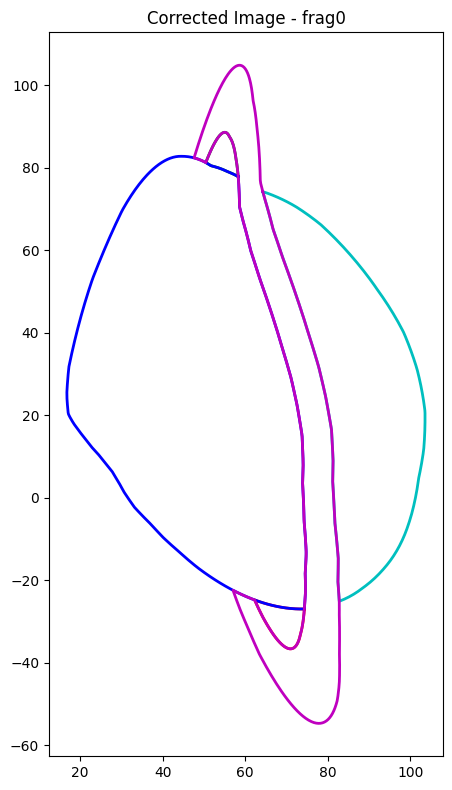

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Function to read CSV files
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Function to prepare training data
def prepare_training_data(distorted_paths, free_paths):
    X, y = [], []
    for d_path, f_path in zip(distorted_paths, free_paths):
        for d_XY, f_XY in zip(d_path, f_path):
            for d_point, f_point in zip(d_XY, f_XY):
                X.append(d_point)
                y.append(f_point)
    return np.array(X), np.array(y)

# Function to plot the curves with Y-axis inversion
def plot(paths_XYs, title='Plot'):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2)  # Inverting Y-axis for visualization
    ax.set_aspect('equal')
    plt.title(title)
    plt.show()

# Function to apply the model to remove distortion
def remove_distortion(paths_XYs, model):
    new_paths = []
    for path in paths_XYs:
        new_path = []
        for XY in path:
            corrected_XY = model.predict(XY)
            new_path.append(corrected_XY)
        new_paths.append(new_path)
    return new_paths

# Function to convert paths to cubic bezier curves
def cubic_bezier_control_points(points):
    p = np.array(points)
    n = len(p) - 1
    a, b, c, r = [0] * (n+1), [0] * (n+1), [0] * (n+1), [0] * (n+1)

    b[0] = 2
    c[0] = 1
    r[0] = p[0] + 2 * p[1]

    for i in range(1, n-1):
        a[i] = 1
        b[i] = 4
        c[i] = 1
        r[i] = 4 * p[i] + 2 * p[i+1]

    a[n-1] = 2
    b[n-1] = 7
    r[n-1] = 8 * p[n-1] + p[n]

    b[n] = 2
    r[n] = p[n]

    # Solve for control points
    for i in range(1, n+1):
        m = a[i] / b[i-1]
        b[i] -= m * c[i-1]
        r[i] -= m * r[i-1]

    control_points_1 = [0] * (n+1)
    control_points_2 = [0] * n

    control_points_1[n] = r[n] / b[n]
    for i in range(n-1, -1, -1):
        control_points_1[i] = (r[i] - c[i] * control_points_1[i+1]) / b[i]

    for i in range(n):
        control_points_2[i] = 2 * p[i+1] - control_points_1[i+1]

    return np.array(control_points_1), np.array(control_points_2)  # Convert to numpy arrays

# Function to convert paths to cubic bezier curves
def paths_to_bezier(paths):
    bezier_paths = []
    for path in paths:
        bezier_path = []
        for points in path:
            p1, p2 = cubic_bezier_control_points(points)
            bezier_path.append((points, p1, p2))
        bezier_paths.append(bezier_path)
    return bezier_paths

# Function to generate SVG
def generate_svg(bezier_paths, filename='output.svg', height=500):
    dwg = svgwrite.Drawing(filename, profile='tiny', height=height)
    for bezier_path in bezier_paths:
        for points, p1, p2 in bezier_path:
            # Convert to numpy arrays
            points = np.array(points)
            p1 = np.array(p1)
            p2 = np.array(p2)

            # Create the SVG path without inverting Y-coordinates
            path = dwg.path(d=f'M {points[0][0]},{points[0][1]}', stroke='black', fill='none', stroke_width=2)
            for i in range(1, len(points)):
                path.push(f'C {p1[i-1][0]},{p1[i-1][1]} {p2[i-1][0]},{p2[i-1][1]} {points[i][0]},{points[i][1]}')
            dwg.add(path)
    dwg.save()

# Load and prepare data
paths_XYs_distorted = read_csv('occlusion2.csv')
paths_XYs_solution = read_csv('occlusion2_sol.csv')
X, y = prepare_training_data(paths_XYs_distorted, paths_XYs_solution)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with weaker parameters
weaker_model = MLPRegressor(hidden_layer_sizes=(50,), alpha=0.1, max_iter=200, random_state=42)
weaker_model.fit(X_train, y_train)

# Output the model's performance
print("Model training completed.")
print("Model score on test data: ", weaker_model.score(X_test, y_test))

# Apply the model to the distorted data
corrected_paths = remove_distortion(paths_XYs_distorted, weaker_model)
plot(corrected_paths, title='Corrected Image - frag0')

# Convert corrected paths to Bezier curves and generate SVG
bezier_paths = paths_to_bezier(corrected_paths)
generate_svg(bezier_paths, filename='frag0_corrected.svg', height=500)

# Automatically download the generated SVG files
files.download('frag0_corrected.svg')


In [ ]:
!pip install tensorflow pandas numpy matplotlib scikit-learn svgwrite cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
